In [1]:
###Loading in the packages we'll need
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from matplotlib.pyplot import gcf
from upsetplot import UpSet
from matplotlib import cm

In [2]:
###Loading in data files. Rows should be metabolite features and columns are metadata/annotation info. Importantly,
###some columns should also represent sample groups for comparison in the Upset plot. Within those group columns,
###cells should say "Yes" if that metabolite feature is present in the sample group or "NA" if it is absent. For our data,
###additional columns include MolNetEnhancer-derived ClassyFire chemical taxonomic assignments. We will use these
###ClassyFire assignments to color our Upset plots.

###The commands below will read in the files, assign our column containing metabolite feature IDs, and designate the
###ClassyFire assignment labels for coloring later.
data = pandas.read_csv("Serum_KW_Matches_Sorted_for_UpsetColoring.csv")
data = data.set_index(['features'])
mass_class_series = data.pop("CF_superclass")

In [3]:
###Currently, the cell values are characters and need to be strings instead. This command will convert them to strings
trans_number = {'Yes': 1, 'No': 1}

In [4]:
###These commands will find each of the columns specified (our sample groups) and convert the character values to string.
###This is important for assigning color values
fch_147L_147V = data.pop("fch_147L_147V")
col_colors_147L_147V = fch_147L_147V.map(trans_number)

In [5]:
###These commands must be run for each sample group column being compared
fch_147L_147WG = data.pop("fch_147L_147WG")
col_colors_147L_147WG = fch_147L_147WG.map(trans_number)

In [6]:
fch_147L_165L = data.pop("fch_147L_165L")
col_colors_147L_165L = fch_147L_165L.map(trans_number)

In [7]:
fch_147L_165V = data.pop("fch_147L_165V")
col_colors_147L_165V = fch_147L_165V.map(trans_number)

In [8]:
fch_147L_165WG = data.pop("fch_147L_165WG")
col_colors_147L_165WG = fch_147L_165WG.map(trans_number)

In [9]:
fch_147L_291L = data.pop("fch_147L_291L")
col_colors_147L_291L = fch_147L_291L.map(trans_number)

In [10]:
fch_147L_291V = data.pop("fch_147L_291V")
col_colors_147L_291V = fch_147L_291V.map(trans_number)

In [11]:
fch_147L_291WG = data.pop("fch_147L_291WG")
col_colors_147L_291WG = fch_147L_291WG.map(trans_number)

In [12]:
fch_147V_147WG = data.pop("fch_147V_147WG")
col_colors_147V_147WG = fch_147V_147WG.map(trans_number)

In [13]:
fch_147V_165L = data.pop("fch_147V_165L")
col_colors_147V_165L = fch_147V_165L.map(trans_number)

In [14]:
fch_147V_165V = data.pop("fch_147V_165V")
col_colors_147V_165V = fch_147V_165V.map(trans_number)

In [15]:
fch_147V_165WG = data.pop("fch_147V_165WG")
col_colors_147V_165WG = fch_147V_165WG.map(trans_number)

In [16]:
fch_147V_291L = data.pop("fch_147V_291L")
col_colors_147V_291L = fch_147V_291L.map(trans_number)

In [17]:
fch_147V_291V = data.pop("fch_147V_291V")
col_colors_147V_291V = fch_147V_291V.map(trans_number)

In [18]:
fch_147V_291WG = data.pop("fch_147V_291WG")
col_colors_147V_291WG = fch_147V_291WG.map(trans_number)

In [19]:
fch_147WG_165L = data.pop("fch_147WG_165L")
col_colors_147WG_165L = fch_147WG_165L.map(trans_number)

In [20]:
fch_147WG_165V = data.pop("fch_147WG_165V")
col_colors_147WG_165V = fch_147WG_165V.map(trans_number)

In [21]:
fch_147WG_165WG = data.pop("fch_147WG_165WG")
col_colors_147WG_165WG = fch_147WG_165WG.map(trans_number)

In [22]:
fch_147WG_291L = data.pop("fch_147WG_291L")
col_colors_147WG_291L = fch_147WG_291L.map(trans_number)

In [23]:
fch_147WG_291V = data.pop("fch_147WG_291V")
col_colors_147WG_291V = fch_147WG_291V.map(trans_number)

In [24]:
fch_147WG_291WG = data.pop("fch_147WG_291WG")
col_colors_147WG_291WG = fch_147WG_291WG.map(trans_number)

In [25]:
fch_165L_165V = data.pop("fch_165L_165V")
col_colors_165L_165V = fch_165L_165V.map(trans_number)

In [26]:
fch_165L_165WG = data.pop("fch_165L_165WG")
col_colors_165L_165WG = fch_165L_165WG.map(trans_number)

In [27]:
fch_165L_291L = data.pop("fch_165L_291L")
col_colors_165L_291L = fch_165L_291L.map(trans_number)

In [28]:
fch_165L_291V = data.pop("fch_165L_291V")
col_colors_165L_291V = fch_165L_291V.map(trans_number)

In [29]:
fch_165L_291WG = data.pop("fch_165L_291WG")
col_colors_165L_291WG = fch_165L_291WG.map(trans_number)

In [30]:
fch_165V_165WG = data.pop("fch_165V_165WG")
col_colors_165V_165WG = fch_165V_165WG.map(trans_number)

In [31]:
fch_165V_291L = data.pop("fch_165V_291L")
col_colors_165V_291L = fch_165V_291L.map(trans_number)

In [32]:
fch_165V_291V = data.pop("fch_165V_291V")
col_colors_165V_291V = fch_165V_291V.map(trans_number)

In [33]:
fch_165V_291WG = data.pop("fch_165V_291WG")
col_colors_165V_291WG = fch_165V_291WG.map(trans_number)

In [34]:
fch_165WG_291L = data.pop("fch_165WG_291L")
col_colors_165WG_291L = fch_165WG_291L.map(trans_number)

In [35]:
fch_165WG_291V = data.pop("fch_165WG_291V")
col_colors_165WG_291V = fch_165WG_291V.map(trans_number)

In [36]:
fch_165WG_291WG = data.pop("fch_165WG_291WG")
col_colors_165WG_291WG = fch_165WG_291WG.map(trans_number)

In [37]:
fch_291L_291V = data.pop("fch_291L_291V")
col_colors_291L_291V = fch_291L_291V.map(trans_number)

In [38]:
fch_291L_291WG = data.pop("fch_291L_291WG")
col_colors_291L_291WG = fch_291L_291WG.map(trans_number)

In [39]:
fch_291V_291WG = data.pop("fch_291V_291WG")
col_colors_291V_291WG = fch_291V_291WG.map(trans_number)

In [40]:
###Merging the sample group assignments together for creating the plot
col_colors = pandas.DataFrame(col_colors_147L_147V).join(pandas.DataFrame(col_colors_147L_147WG),how='outer').join(
pandas.DataFrame(col_colors_147L_165L),how='outer').join(pandas.DataFrame(col_colors_147L_165V),how='outer').join(
pandas.DataFrame(col_colors_147L_165WG),how='outer').join(pandas.DataFrame(col_colors_147L_291L),how='outer').join(
pandas.DataFrame(col_colors_147L_291V),how='outer').join(pandas.DataFrame(col_colors_147L_291WG),how='outer').join(
pandas.DataFrame(col_colors_147V_147WG),how='outer').join(pandas.DataFrame(col_colors_147V_165L),how='outer').join(
pandas.DataFrame(col_colors_147V_165V),how='outer').join(pandas.DataFrame(col_colors_147V_165WG),how='outer').join(
pandas.DataFrame(col_colors_147V_291L),how='outer').join(pandas.DataFrame(col_colors_147V_291V),how='outer').join(
pandas.DataFrame(col_colors_147V_291WG), how='outer').join(pandas.DataFrame(col_colors_147WG_165L),how='outer').join(
pandas.DataFrame(col_colors_147WG_165V),how='outer').join(pandas.DataFrame(col_colors_147WG_165WG),how='outer').join(
pandas.DataFrame(col_colors_147WG_291L),how='outer').join(pandas.DataFrame(col_colors_147WG_291V),how='outer').join(
pandas.DataFrame(col_colors_147WG_291WG),how='outer').join(pandas.DataFrame(col_colors_165L_165V),how='outer').join(
pandas.DataFrame(col_colors_165L_165WG),how='outer').join(pandas.DataFrame(col_colors_165L_291L),how='outer').join(
pandas.DataFrame(col_colors_165L_291V),how='outer').join(pandas.DataFrame(col_colors_165L_291WG),how='outer').join(
pandas.DataFrame(col_colors_165V_165WG),how='outer').join(pandas.DataFrame(col_colors_165V_291L),how='outer').join(
pandas.DataFrame(col_colors_165V_291V),how='outer').join(pandas.DataFrame(col_colors_165V_291WG),how='outer').join(
pandas.DataFrame(col_colors_165WG_291L),how='outer').join(pandas.DataFrame(col_colors_165WG_291V),how='outer').join(
pandas.DataFrame(col_colors_165WG_291WG),how='outer').join(pandas.DataFrame(col_colors_291L_291V),how='outer').join(
pandas.DataFrame(col_colors_291L_291WG),how='outer').join(pandas.DataFrame(col_colors_291V_291WG),how='outer').join(
pandas.DataFrame(mass_class_series),how='inner')

In [41]:
###Tying all the assignments together, with their color designations
col_colors=col_colors.set_index(col_colors_147L_147V==1).set_index(col_colors_147L_147WG==1, append=True).set_index(
col_colors_147L_165L==1,append=True).set_index(col_colors_147L_165V==1,append=True).set_index(col_colors_147L_165WG==1,append=True).set_index(
col_colors_147L_291L==1,append=True).set_index(col_colors_147L_291V==1,append=True).set_index(col_colors_147L_291WG==1,append=True).set_index(
col_colors_147V_147WG==1,append=True).set_index(col_colors_147V_165L==1,append=True).set_index(col_colors_147V_165V==1,append=True).set_index(
col_colors_147V_165WG==1,append=True).set_index(col_colors_147V_291L==1,append=True).set_index(col_colors_147V_291V==1,append=True).set_index(
col_colors_147V_291WG==1,append=True).set_index(col_colors_147WG_165L==1,append=True).set_index(col_colors_147WG_165V==1,append=True).set_index(
col_colors_147WG_165WG==1,append=True).set_index(col_colors_147WG_291L==1,append=True).set_index(col_colors_147WG_291V==1,append=True).set_index(
col_colors_147WG_291WG==1,append=True).set_index(col_colors_165L_165V==1,append=True).set_index(col_colors_165L_165WG==1,append=True).set_index(
col_colors_165L_291L==1,append=True).set_index(col_colors_165L_291V==1,append=True).set_index(col_colors_165L_291WG==1,append=True).set_index(
col_colors_165V_165WG==1,append=True).set_index(col_colors_165V_291L==1,append=True).set_index(col_colors_165V_291V==1,append=True).set_index(
col_colors_165V_291WG==1,append=True).set_index(col_colors_165WG_291L==1,append=True).set_index(col_colors_165WG_291V==1,append=True).set_index(
col_colors_165WG_291WG==1,append=True).set_index(col_colors_291L_291V==1,append=True).set_index(col_colors_291L_291WG==1,append=True).set_index(
col_colors_291V_291WG==1,append=True)

In [42]:
###Assigning color values to each ClassyFire assignment label. These will change according to the data being analyzed
metabolites_color={'no matches':(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
                  'Lipids and lipid-like molecules':(1.0, 0.4980392156862745, 0.054901960784313725),
                  'Organic acids and derivatives':(0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
                  'Organic nitrogen compounds':(0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
                  'Organoheterocyclic compounds':(0.5803921568627451, 0.403921568627451, 0.7411764705882353)}

<Figure size 2880x1440 with 0 Axes>

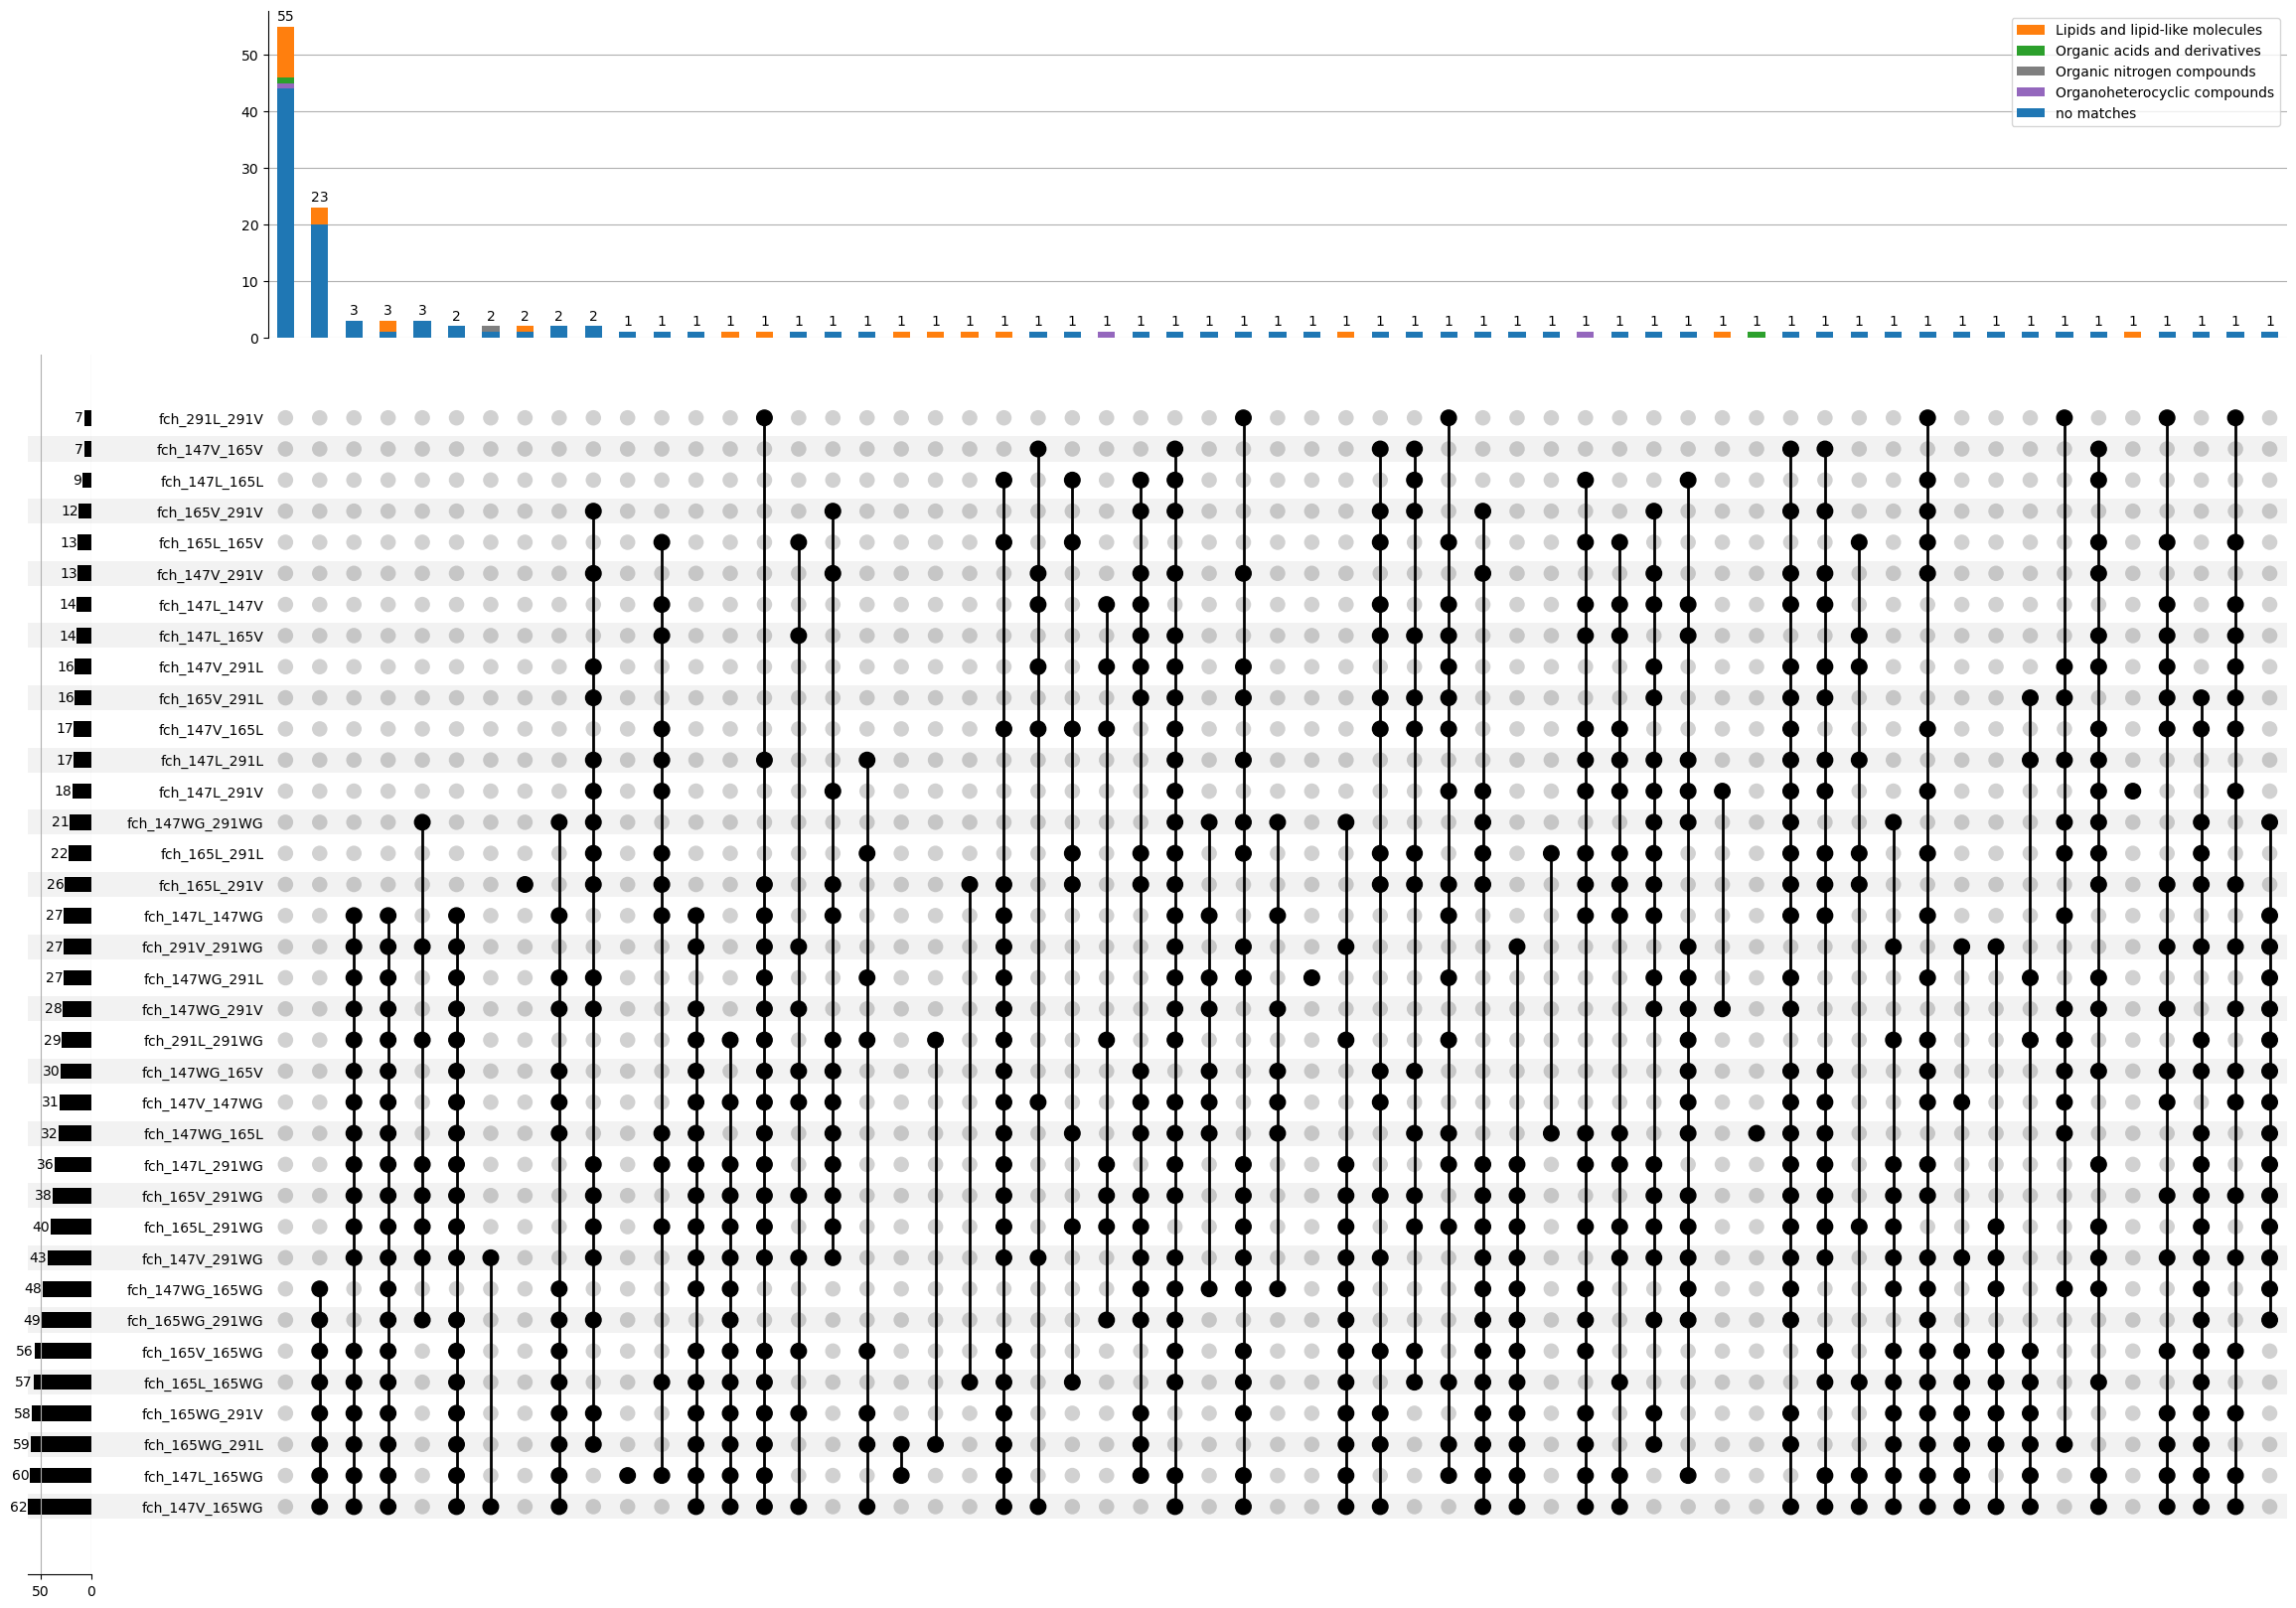

In [43]:
###Making the Upset plot. Parameters can be adjusted according to the specifics of the data and to help with visualization
upset=UpSet(col_colors,show_counts=True, intersection_plot_elements=0,sort_by='cardinality',
           min_subset_size=1)
upset.add_stacked_bars(by='CF_superclass',colors=metabolites_color,elements=10)
plt.figure(figsize=(40,20))
plt.style.use('default')
upset.plot()
plt.savefig("Serum_KW_Colored_Upset_Subset1.pdf", dpi = 300, bbox_inches = 'tight')
plt.savefig("Serum_KW_Colored_Upset_Subset1.png", dpi = 300, bbox_inches = 'tight')


<Figure size 4000x2000 with 0 Axes>

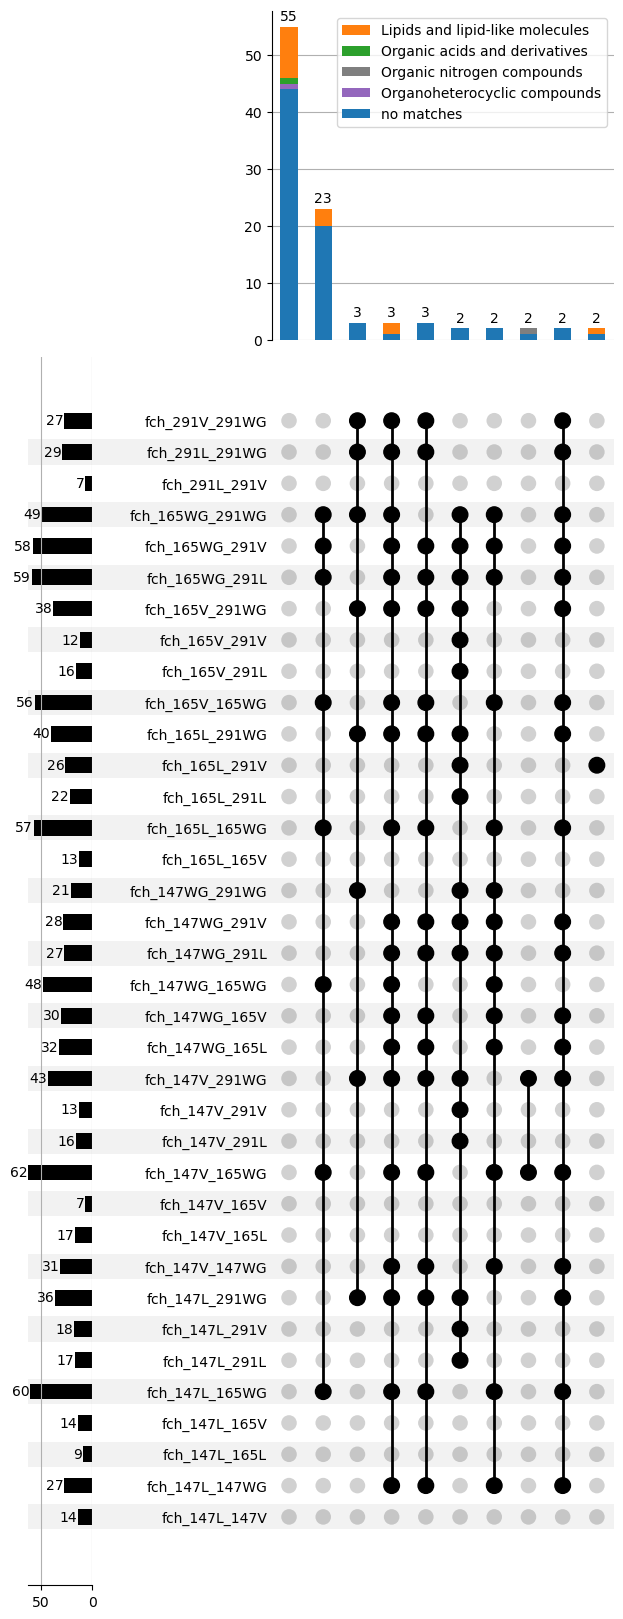

In [44]:
###Adjusting some parameters. Figure can be saved with the "plt.savefig" command
upset=UpSet(col_colors,show_counts=True, intersection_plot_elements=0,sort_categories_by=None,
           sort_by='cardinality',min_subset_size=2)
upset.add_stacked_bars(by='CF_superclass',colors=metabolites_color,elements=10)
plt.figure(figsize=(40,20))
plt.style.use('default')
upset.plot()
plt.savefig("Serum_KW_Colored_Upset_Subset2.pdf", dpi=300, bbox_inches='tight')